In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# python ..\lyra.py evc DCPP_S1.fchk --AH DCPP_S0.fchk
# note that reorganization energy is calculated on final state
# reference: Fig. 2(b) DCPP solution in 10.1021/acs.jpcc.5b01323
with open("lyra_vibronic_analysis.out", 'r') as f:
    lines = f.readlines()

num_modes = 84
freq, lmd = [], []
for i in range(len(lines)):
    if "Total Reorganization Energy" in lines[i]:
        for n in range(num_modes):
            splt = lines[i+5+n].split()
            freq.append(float(splt[-2]))
            lmd.append(float(splt[-1])*0.123983) #convert to meV
        break


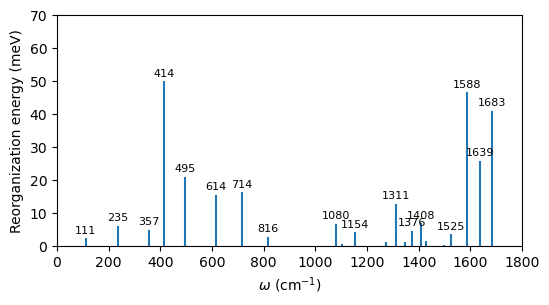

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax.vlines(freq,[0],lmd)
for i in range(num_modes):
    if lmd[i] > 2:
        ax.annotate(int(round(freq[i])), (freq[i],lmd[i]+1.5), fontsize=8, ha="center")
ax.set_xlim(0, 1800)
ax.set_ylim(0,70)
ax.set_xlabel(r"$\omega$ ($\mathrm{cm}^{-1}$)")
ax.set_ylabel(r"Reorganization energy (meV)")
plt.show()